## Load packages

In [1]:
import env
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy import displacy
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
import datetime as dt
import matplotlib.dates as mdates
import json

## Conncet to database

In [2]:
conn = sqlite3.connect(env.DB_URL)
cur = conn.cursor()

df = pd.read_sql("SELECT id,Titel,Body,Kategorie,Datum,Quelle FROM Artikel WHERE Quelle ='Reuters'", conn, index_col="id", parse_dates=True)
df.shape
df.head()

,Titel,Body,Kategorie,Datum,Quelle
id,,,,,
1,China smartphone maker Vivo says to suspend al...,Chinese smartphone maker Vivo said on Tuesday ...,Weltnachrichten,2019-10-08 00:00:00,Reuters
2,China row threatens to upstage league's return...,The NBA returned to Japan for the first time i...,Weltnachrichten,2019-10-08 00:00:00,Reuters
3,Chinese state media slams basketball's NBA in ...,Chinese state media on Wednesday accused the N...,Top-Nachrichten,2019-10-09 00:00:00,Reuters
4,NBA fans in China seek refund from Tencent as ...,Some Chinese National Basketball Association (...,Top-Nachrichten,2019-10-09 00:00:00,Reuters
5,Shanghai Sports Federation says NBA fan event ...,The Shanghai Sports Federation said on Wednesd...,Top-Nachrichten,2019-10-09 00:00:00,Reuters


In [3]:
df.shape

(235, 5)

## Save as csv

In [4]:
df.to_csv(path_or_buf="./data/news_en.csv", sep=',',encoding='utf-8')

## Count articles per day

In [5]:
artikelliste={}

for i in range(0, len(df)):
    datum = df.iloc[i]['Datum']
    datum = datum.split(" ")[0]
    
    if datum in artikelliste:
        artikelliste[datum] += 1
    else:
        artikelliste[datum] = 1
            

/Users/andreas/.conda/envs/First/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


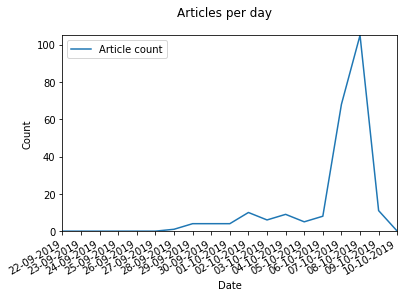

In [6]:
startdatum = "2019-09-22"
enddatum = "2019-10-10"

datelist = pd.date_range(start=startdatum, end=enddatum).tolist()
datelist = pd.to_datetime((datelist))

artikelliste0 =[]
for date in datelist:
    if str(date).split()[0] in artikelliste:
        artikelliste0.append(artikelliste[str(date).split()[0]])
    else:
        artikelliste0.append(0)
        
tickslist = pd.date_range(start=startdatum, end=enddatum, freq='1D').tolist()

plt.plot(datelist, artikelliste0, label="Article count")
plt.axis([startdatum, enddatum, 0, max(artikelliste0)])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xlabel('Date')
plt.xticks(tickslist)
plt.ylabel('Count')
plt.suptitle('Articles per day')
plt.gcf().autofmt_xdate()
plt.legend()
plt.savefig('./images/anzahl_en.png', dpi=300)
plt.show()

## Mark persons and organizations

In [7]:
colors = {'ORG': 'red', 'PERSON':'yellow'}
options = {'ents': ['ORG', 'PERSON'], 'colors': colors}
for i in range(0, 10):
    titel = df.iloc[i]['Titel']
    body = df.iloc[i]['Body']
    doc = nlp(titel)
    doc.user_data['title'] = 'Persons in titel ' + str(i)
    displacy.render(doc, style='ent', jupyter=True, options=options )

In [8]:
colors = { 'PERSON':'red'}
options = {'ents': [ 'PERSON'], 'colors': colors}
for i in range(0, 2):
    body = df.iloc[i]['Body']
    doc = nlp(body)
    doc.user_data['title'] = 'Persons in text ' + str(i)
    displacy.render(doc, style='ent', jupyter=True, options=options)

## Build list of person counts

In [9]:
personenliste=dict()

for i in range(0, len(df)):
    body = df.iloc[i]['Body']
    titel = df.iloc[i]['Titel']
    doc = nlp(titel + "\n" + body)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            if ent.text in personenliste:
                personenliste[ent.text] += 1
            else:
                personenliste[ent.text] = 1

In [10]:
personenliste

{'Daryl Morey': 16,
 'Adam Silver': 10,
 'Tingshu WangSilver': 1,
 'James Harden': 3,
 'Mike D’Antoni': 1,
 'Raptors': 1,
 'Jason LeeIn': 1,
 'Mitch McConnell': 8,
 'Verwandte ThemenChina': 4,
 'Saitama': 1,
 'Tencent': 2,
 'WeChat': 2,
 'Yao Ming': 4,
 'Bobby Yip': 2,
 'Ted Cruz': 4,
 'Joshua RobertsHere': 1,
 'Rick Scott': 1,
 'Ben Sasse': 3,
 'Daryl': 2,
 '” - Joseph Tsai': 1,
 'Tom Malinowski': 2,
 '” - Julian Castro': 1,
 'Hu Xijin': 2,
 'Josh Hawley': 2,
 'Li-Ning': 2,
 'Marco Rubio': 2,
 'Chuck Schumer': 2,
 'Yao': 4,
 'Rick Welts': 1,
 'Jonathan Oatis': 1,
 'Klay Thompson': 2,
 'Gordon Hayward': 1,
 'Verwandte ThemenChina row': 1,
 'Joseph Tsai': 4,
 'Geng Shuang': 2,
 'Geng': 2,
 'Houston Rockets - Pre': 1,
 'Thomas PeterSeveral Chinese': 1,
 'Evan Li': 1,
 'Donald Trump': 128,
 'REPAIR’ Morey’s': 1,
 'Mark Tatum': 2,
 'Tingshu': 1,
 'Zara': 1,
 'ITX.MC': 1,
 'Nick Stansbury': 1,
 'Bob Dudley': 1,
 'Brian Gilvary': 1,
 '” Francis Condon': 1,
 'Condon': 1,
 'Vigeo Eiris': 1,
 '

## Save countlist

In [11]:
import json
json = json.dumps(personenliste)
f = open("./data/personenliste_en.json","w")
f.write(json)
f.close()

## Clean list

In [12]:
def cleandict_en(inputdict):
    
    dict2 = inputdict.copy()
    for key in inputdict.keys(): 
        if key.startswith("\\"):
            del dict2[key]
        if key.strip() == "":
            del dict2[key]
        if key.strip() == "Verwandte ThemenFactbox":
            del dict2[key]
        if key.strip() == "Sgt":
            del dict2[key]
        
    return dict2

In [13]:
personenclean = cleandict_en(personenliste)

## Map personnames together (i.e. "Donald Trump" and "Trump")

In [14]:
def listekompakt(inputdict):
    outputdict = {}

    for name, num in inputdict.items():
        for key in inputdict.keys():            
            if (name == key):
                continue
            if (name in key) and (inputdict[name] > 5):
                inputdict[name] += num
                inputdict[key] = 0
                break
    for name, num  in inputdict.items():
        if num > 0:
            outputdict[name] = num
    return outputdict

In [15]:
personenkompakt = listekompakt(personenclean)

In [16]:
import json
json = json.dumps(personenkompakt)
f = open("./data/personenliste_en_clean.json","w")
f.write(json)
f.close()

## Barchart of sortet counts

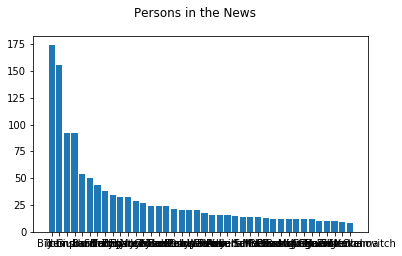

In [37]:
personen = sorted(personenkompakt.items(), key=itemgetter(1),reverse=True)

names = list(zip(*personen))[0][0:40]
values = list(zip(*personen))[1][0:40]
x_pos = np.arange(len(names)) 

plt.xticks(rotation='vertical')
plt.subplots_adjust(bottom=0.2)
plt.bar(x_pos, values)
plt.xticks(x_pos, names) 
plt.suptitle('Persons in the News')
plt.savefig('./images/hauefigkeit_news_en.png', dpi=300)
plt.show()

## Build list of counts per day

In [18]:
datumliste={}

for i in range(0, len(df)):
    body = df.iloc[i]['Body']
    titel = df.iloc[i]['Titel']
    datum = df.iloc[i]['Datum']
    datum = datum.split(" ")[0]
    doc = doc = nlp(titel + "\n" + body)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            if ent.text in datumliste:
                if datum in datumliste[ent.text]:
                    datumliste[ent.text][datum] += 1
                else:
                    datumliste[ent.text][datum] = 1
            else:
                datumliste[ent.text] = {}
                datumliste[ent.text][datum] = 1

In [19]:
datumliste

{'Daryl Morey': {'2019-10-08': 6,
  '2019-10-09': 3,
  '2019-10-07': 5,
  '2019-10-06': 2},
 'Adam Silver': {'2019-10-08': 5, '2019-10-09': 4, '2019-10-06': 1},
 'Tingshu WangSilver': {'2019-10-08': 1},
 'James Harden': {'2019-10-08': 2, '2019-10-07': 1},
 'Mike D’Antoni': {'2019-10-08': 1},
 'Raptors': {'2019-10-08': 1},
 'Jason LeeIn': {'2019-10-08': 1},
 'Mitch McConnell': {'2019-10-08': 3,
  '2019-10-09': 1,
  '2019-10-07': 2,
  '2019-10-06': 1,
  '2019-09-30': 1},
 'Verwandte ThemenChina': {'2019-10-09': 1, '2019-10-06': 1, '2019-10-08': 2},
 'Saitama': {'2019-10-09': 1},
 'Tencent': {'2019-10-09': 2},
 'WeChat': {'2019-10-09': 1, '2019-10-07': 1},
 'Yao Ming': {'2019-10-09': 1, '2019-10-07': 2, '2019-10-06': 1},
 'Bobby Yip': {'2019-10-09': 1, '2019-10-08': 1},
 'Ted Cruz': {'2019-10-07': 3, '2019-10-06': 1},
 'Joshua RobertsHere': {'2019-10-07': 1},
 'Rick Scott': {'2019-10-07': 1},
 'Ben Sasse': {'2019-10-07': 1, '2019-10-06': 2},
 'Daryl': {'2019-10-07': 2},
 '” - Joseph Tsai'

In [20]:
import json
json = json.dumps(datumliste)
f = open("./data/datumliste_en.json","w")
f.write(json)
f.close()

## Map personlists together (i.e. "Donald Trump" and "Trump")

In [28]:
def uniondict(dict1,dict2):
    returndict ={}
    
    allkeys = list(set(list(dict1.keys()) + list(dict2.keys())))
    allvalues = [0] * len(allkeys)
    for i in range(len(allkeys)):
        returndict[allkeys[i]] = allvalues[i]
    
    for key1, value1 in dict1.items():
        returndict[key1] += value1
    for key2, value2 in dict2.items():
        returndict[key2] += value2
                
    return returndict

In [29]:
def datekompakt(inputdict):
    outputdict = {}

    for name, datelist in inputdict.items():
        for key in inputdict.keys():
            if (name == key):
                continue
            if (name in key) and (len(inputdict[name]) > 3):
                inputdict[name] = uniondict(inputdict[key],datelist)
                inputdict[key] = {}
                break
    for name, datelist  in inputdict.items():
        if datelist != {}:      
            outputdict[name] = datelist
    return outputdict

## Clean lists

In [30]:
datumclean= cleandict_en(datumliste)

In [31]:
datumkompakt = datekompakt(datumclean)

In [32]:
import json
json = json.dumps(datumkompakt)
f = open("./data/datumliste_en_clean.json","w")
f.write(json)
f.close()

## Lineplots for persons

In [34]:
def namenplot(name1, name2, startdatum, enddatum, frequenz, savepfad):
    dict1 = datumkompakt[name1]
    dict2 = datumkompakt[name2]

    datelist = pd.date_range(start=startdatum, end=enddatum).tolist()
    datelist = pd.to_datetime((datelist))

    y_name1 =[]
    y_name2 =[]
    for date in datelist:
        if str(date).split()[0] in dict1:
            y_name1.append(dict1[str(date).split()[0]])
        else:
            y_name1.append(0)
        if str(date).split()[0] in dict2:
            y_name2.append(dict2[str(date).split()[0]])
        else:
            y_name2.append(0)

    tickslist = pd.date_range(start=startdatum, end=enddatum, freq=frequenz).tolist()

    plt.plot(datelist, y_name1,label=name1)
    plt.plot(datelist, y_name2,linestyle='--',label=name2)
    max1 = max(y_name1)
    max2 = max(y_name2)
    plt.axis([startdatum, enddatum, 0, max([max1,max2])+3])

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.xlabel('Date')
    plt.xticks(tickslist)
    plt.ylabel('Frequecy')
    plt.suptitle('Mentions in the news ' + name1 + " and " + name2)
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.savefig(savepfad, dpi=300)
    plt.show()

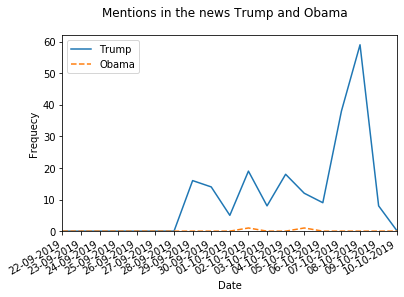

In [27]:
namenplot("Trump", "Obama", startdatum, enddatum, '1D', './images/trump_obama.png')